In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
dataset = np.genfromtxt("./dataset.csv", delimiter=',', dtype=[float, float, float])

In [3]:
def get_data(dataset):
    """データセットをnparrayに変換する"""
    raw_data = [list(item)[:3] for item in dataset]
    return np.array(raw_data)

In [4]:
t = get_data(dataset)
data = t[:,0:2]

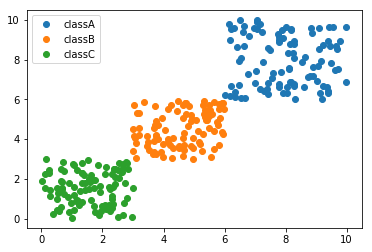

In [5]:
plt.plot(data[0:100,0],data[0:100,1],'o',label="classA")
plt.plot(data[100:200,0],data[100:200,1],'o',label="classB")
plt.plot(data[200:300,0],data[200:300,1],'o',label="classC")
plt.legend()

In [6]:
# 平均0,分散1にする正規化を行う
data_mean0 = data - np.mean(data)
data_std0 = np.sqrt(np.sum((data_mean0[:,0])**2) / data[:,0].shape[0])
data_std1 = np.sqrt(np.sum((data_mean0[:,1])**2) / data[:,1].shape[0])
data_std = np.array([data_std0,data_std1])
data_normalized = data_mean0 / data_std

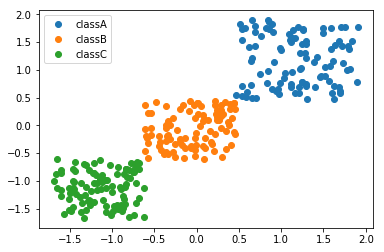

In [7]:
plt.plot(data_normalized[0:100,0],data_normalized[0:100,1],'o',label="classA")
plt.plot(data_normalized[100:200,0],data_normalized[100:200,1],'o',label="classB")
plt.plot(data_normalized[200:300,0],data_normalized[200:300,1],'o',label="classC")
plt.legend()

  $\Phi_X = \left(
    \begin{array}{cc}
      \sigma_{11} & \sigma_{12}\\
      \sigma_{12} & \sigma_{22}\\
    \end{array}
  \right)$
  
  $\sigma_{11}$は`data_normalized[:,0]`の分散        
  $\sigma_{22}$は`data_normalized[:,1]`の分散        
         
         
  $\sigma_{12}$は`data_normalized[:,0]`と`data_normalized[:,1]`の共分散          
  
  $
      Cov(X,Y) = \frac{1}{N} \sum_{n=0}^N(X_n - \overline{X})(Y_n - \overline{Y})
  $

In [8]:
Cov = np.sum(data_mean0[:,0]*data_mean0[:,1])
Cov = Cov/data_mean0.shape[0]

phi_X = np.array([[data_std[0]**2,Cov],[Cov,data_std[1]**2]])
phi_X

array([[ 7.68946569,  6.89261654],
       [ 6.89261654,  7.83475055]])

In [9]:
# 固有値と固有ベクトルを求める
la,ev = np.linalg.eig(phi_X)
print(la)
print(ev)

[  0.86910879  14.65510745]
[[-0.71082297 -0.70337096]
 [ 0.70337096 -0.71082297]]


D は 求めた固有値を対角成分にもつ対角行列とする       
$
  D = \left(
    \begin{array}{cccc}
      \lambda_{1} & 0 & \ldots & 0 \\
       0 & \lambda_{2} & \ldots & 0 \\
      \vdots & \vdots & \ddots & \vdots \\
       0 & 0 & \ldots & \lambda_{D}
    \end{array}
  \right)
$

In [10]:
D = np.diag(la)
D

array([[  0.86910879,   0.        ],
       [  0.        ,  14.65510745]])

$
    \Phi_X = \boldsymbol{E}\boldsymbol{D}\boldsymbol{E}^{\mathrm{T}}
$
を確認する

In [11]:
phi_X2 = np.dot(ev,D).dot(ev.T)
phi_X2

array([[ 7.68946569,  6.89261654],
       [ 6.89261654,  7.83475055]])

$\boldsymbol{P}$を計算する         
$
    \boldsymbol{P} = \boldsymbol{Q}\boldsymbol{D}^\frac{-1}{2}\boldsymbol{E}^{\mathrm{T}}
$

$\boldsymbol{D}^\frac{-1}{2}$は$\boldsymbol{D}$の対角成分を$-\frac{1}{2}$乗したもの       

$\boldsymbol{Q}$は$\boldsymbol{P}$と同じサイズで任意の直交行列とする          

In [12]:
D2 = D*(1/np.sqrt(2))
D2

array([[  0.61455272,   0.        ],
       [  0.        ,  10.36272586]])

In [13]:
Q = np.matrix(np.identity(2))
Q

matrix([[ 1.,  0.],
        [ 0.,  1.]])

In [14]:
P = np.dot(Q,D2).dot(ev.T)
P

matrix([[-0.43683819,  0.43225854],
        [-7.28884045, -7.36606354]])

(D,D)行列$\boldsymbol{P}$による線形変換             
$
    \boldsymbol{U} = \boldsymbol{P}\boldsymbol{X}
$
を求め、白色化を行う(Dは$\boldsymbol{X}$が存在する空間の次元数)                     

In [15]:
U = data_normalized.transpose()
U = P.dot(U)
U = U.transpose()

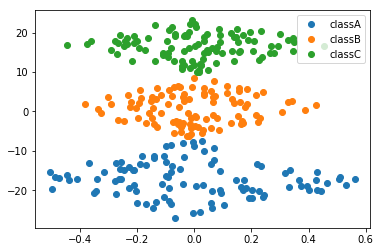

In [16]:
plt.plot(U[0:100,0],U[0:100,1],'o',label="classA")
plt.plot(U[100:200,0],U[100:200,1],'o',label="classB")
plt.plot(U[200:300,0],U[200:300,1],'o',label="classC")
plt.legend()

In [17]:
P_ZCA = ev.dot((D2+10e-6*Q)).dot(ev.T)
P_ZCA

matrix([[ 5.43728333,  4.8738159 ],
        [ 4.8738159 ,  5.54001524]])

In [20]:
U = data_normalized.transpose()
U = P_ZCA.dot(U)
U = U.transpose()

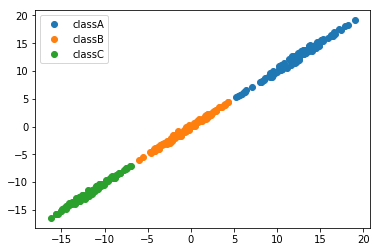

In [21]:
plt.plot(U[0:100,0],U[0:100,1],'o',label="classA")
plt.plot(U[100:200,0],U[100:200,1],'o',label="classB")
plt.plot(U[200:300,0],U[200:300,1],'o',label="classC")
plt.legend()